![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Logo_Swile.svg/2560px-Logo_Swile.svg.png)

## *"The most useless card of the moment"*

[Swile](https://www.swile.co/en-FR) is a french company whose goal is to offer employee benefits via a payment card. The company was founded in 2017 and raised $70M Series C in 2020.

In [ ]:
from IPython.display import Video
Video(
    "https://essentials-assets.s3.eu-west-3.amazonaws.com/M03-Python_programming_and_statistics/D02-A_B_testing_and_web_analytics/Swile_presentation.mp4",
    width=700,
    height=500
    )

After raising this much money, COVID hit western world really hard and almost all countries were on lock-down putting Swile in a really hard position since no restaurants were opened. 

Instead of waiting for COVID to pass, they decided to launch a large marketing campaign called: *La carte la plus inutile du moment* (The most useless card of the moment). The goal was to get to sign new clients despite the tough situation. 

In almost every big city in France, we could see this kind of advertisement: 

![](https://essentials-assets.s3.eu-west-3.amazonaws.com/M03-Python_programming_and_statistics/D02-A_B_testing_and_web_analytics/swile_car.webp)

Now that the marketing campaign is done, Swile would like to know whether this marketing campaign add an impact on sales! 

Swile provided you with some data about sales before the marketing campaign. Our goal will be to check whether this marketing campaign was a genius idea or a huge failure so that the company could replicate it abroad. 

This dataset describes the number of calls on the same day in France and abroad. The only difference between these two samples is the impact of Marketing campaign. 

Test whether the average number of calls in France is actually higher than the ones abroad. 

## Step 1 - Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Step 2 - Import Dataset 

Now you need to import your dataset. Download `swile_calls.csv` and load it in your notebook using `pandas`

In [2]:
df = pd.read_csv("swile_sales_calls.csv")
df.head()

,calls_abroad,calls_in_France
0,4,6
1,4,2
2,4,9
3,9,9
4,2,9


## Step 3 - EDA 

For our EDA, we will simply calculate the `mean` for both our columns and then try to visualize it using `.plot()` function in `pandas`

In [3]:
df.mean()

calls_abroad       5.500000
calls_in_France    5.785714
dtype: float64

<AxesSubplot:>

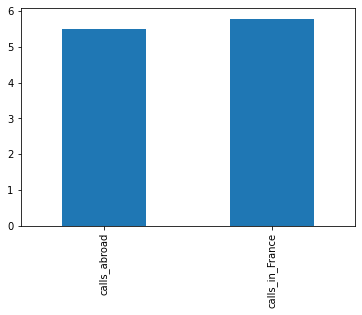

In [4]:
df.mean().plot(kind="bar")

## Step 4 - Define hypothesises

Now what we need to do is to define our $H_0$ and $H_1$: 

* $H_0$ - Number of calls in France <= 5.5
* $H_1$ - Number of calls in France > 5.5

## Step 5 - Calculate Z-score 

Let's calculate our $Z-score$ so that we will be able to run our test. To do so, you will need to:

* Calculate the average `calls_in_France` 
* Calculate the std of `calls_in_France` 
* Find sample size `n`
* Apply $Z = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$

In [7]:
# Calculate Z-score 
sample_average = df.mean()["calls_in_France"]
sample_std = df.std()["calls_in_France"]
mu = df.mean()["calls_abroad"]
n = len(df)

z_score = (sample_average - mu)/(sample_std/np.sqrt(n))
print("Z-score equal: {}".format(z_score))

Z-score equal: 1.1664524375772458


## Step 6 - Set $\alpha$ 

Now we need to set a confidence level $\alpha$, after talking with Swile's marketing team, they told us that `10%` seemed enough. 

In [8]:
# Define alpha 
alpha = 0.10

## Step 7 - Compare p-value to $\alpha$ 

Finally, we need to get our `p-value`. Instead of looking at tools like [Statdistributions.com](https://statdistributions.com), you can use this function from `statsmodels` library: 


* [`ztest`](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html)

In [9]:
from statsmodels.stats.weightstats import ztest

z_score, p_value = ztest(df["calls_in_France"], alternative='larger', value=mu)

print("Z_score value is: {}".format(z_score))
print("p-value is: {}".format(p_value))

if p_value < alpha:
    print("We can reject the Null Hypothesis")
else:
    print("We can't reject the Null hypothesis")

Z_score value is: 1.1664524375772454
p-value is: 0.12171578397679123
We can't reject the Null hypothesis


## Step 8 (Optional) - Visualize probability

Finally, one cool thing could be to visualize your Z-test! One thing that we could use is `matplotlib.pyplot` library with `seaborn`. Check out this code and try to understand the results. 

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


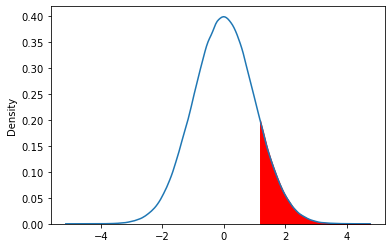

In [12]:
### Visualize area under curve
import seaborn as sns 

# Displot from seaborn gives us a distribution from what is inside the parenthesis
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None) 

# This is a mask that will let us filter only the values beyond z-score
mask = ax.lines[0].get_xydata()[:, 0] > z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = ax.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = ax.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
ax.fill_between(x_area_under_curve, y_area_under_curve, color="red")
plt.show()